In [1]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [2]:
base_case = hydro_opt()

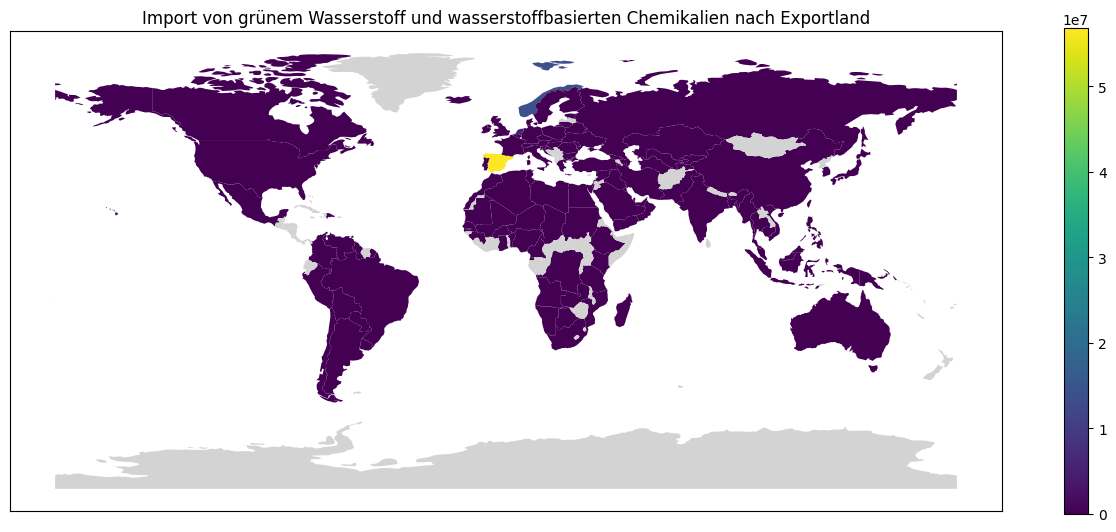

In [3]:
# Initialisieren des Modells mit Standardparametern
base_case = hydro_opt()
# Optimierung des Modells
base_case.optimize()
# beispielhafter Zugriff auf die abgespeicherten Ergebnisse als pandas DataFrame
results = base_case.results_df
# Abspeichern der Ergebnisse als csv mit deutschen Dezimaltrennzeichen
results.to_csv("Ergebnisse.csv", sep=";", decimal=",")
# Visualisierng des Modells
base_case.visualize()

In [4]:
base_case_opt = base_case.optimize(return_model=True, return_as_df=True)

ERROR: Unable to clone Pyomo component attribute. Component 'obj' contains an
uncopyable field '_init_sense' (<class
'pyomo.core.base.initializer.ConstantInitializer'>).  Setting field to `None`
on new object


In [5]:
#base_case_opt.to_csv("Ergebnisse Basis Szenario.csv", sep=";", decimal=",")
base_case_opt

,H2 Schiff,H2 Pipeline,H2 zu NH3 Schiff,H2 zu NH3 Pipeline,H2 für NH3 Umwandlung,H2 zu CH3OH Schiff,H2 zu CH3OH Pipeline,H2 für CH3OH Umwandlung,H2 für Umwandlung,H2 Import,NH3 Schiff,NH3 Pipeline,NH3 Import,CH3OH Schiff,CH3OH Pipeline,CH3OH Import,Gesamter Import
Code,,,,,,,,,,,,,,,,,
DZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


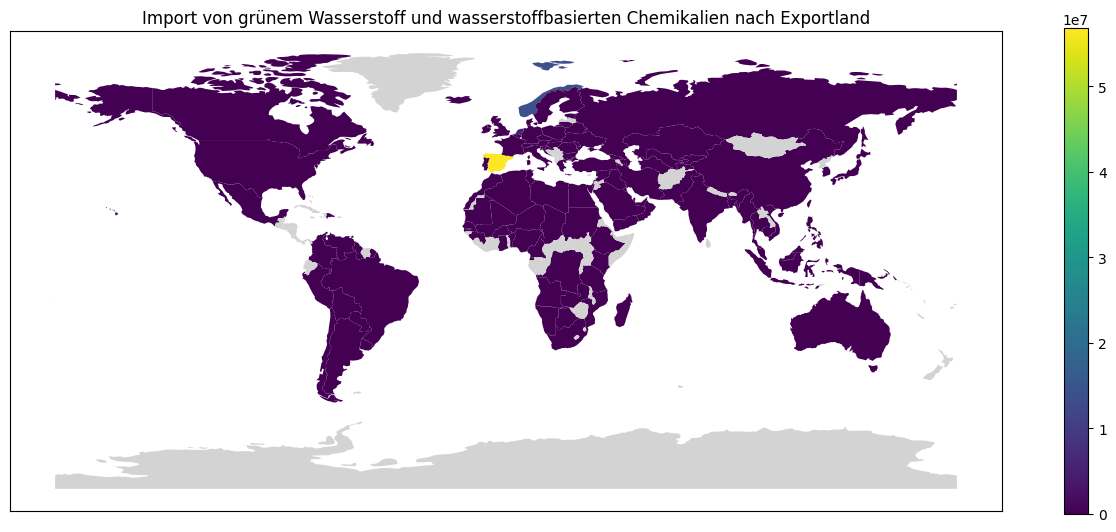

In [6]:
base_case.visualize()
#plt.savefig("Basis Szenario - Alles")

base_case.visualize(vis_style="bar")
plt.savefig("Basis Szenario - Alles - Bar")

base_case.visualize(what="commodities", figsize=(8,8))
#plt.savefig("Basis Szenario - Chemikalien")

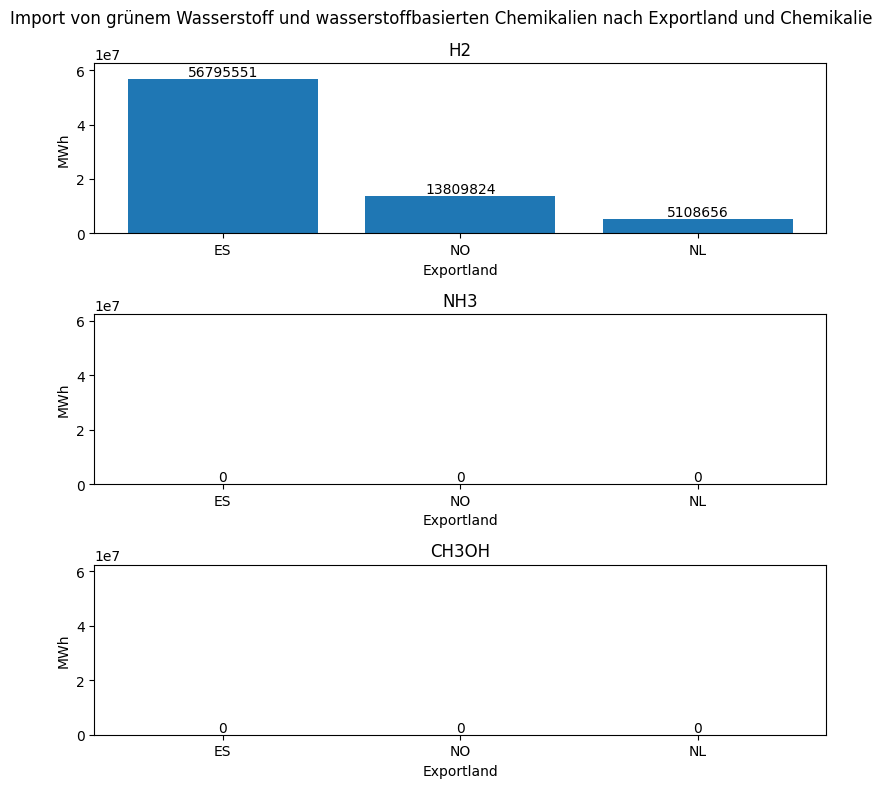

In [7]:
base_case.visualize(what="commodities", vis_style="bar", figsize=(8,8))
#plt.savefig("Basis Szenario - Chemikalien - Bar")
#plt.savefig('Basis Szenario - Chemikalien - Bar', bbox_inches="tight")

base_case.visualize(what="hydrogen_conversion")
plt.savefig("Basis Szenario - Wasserstoff Detail")

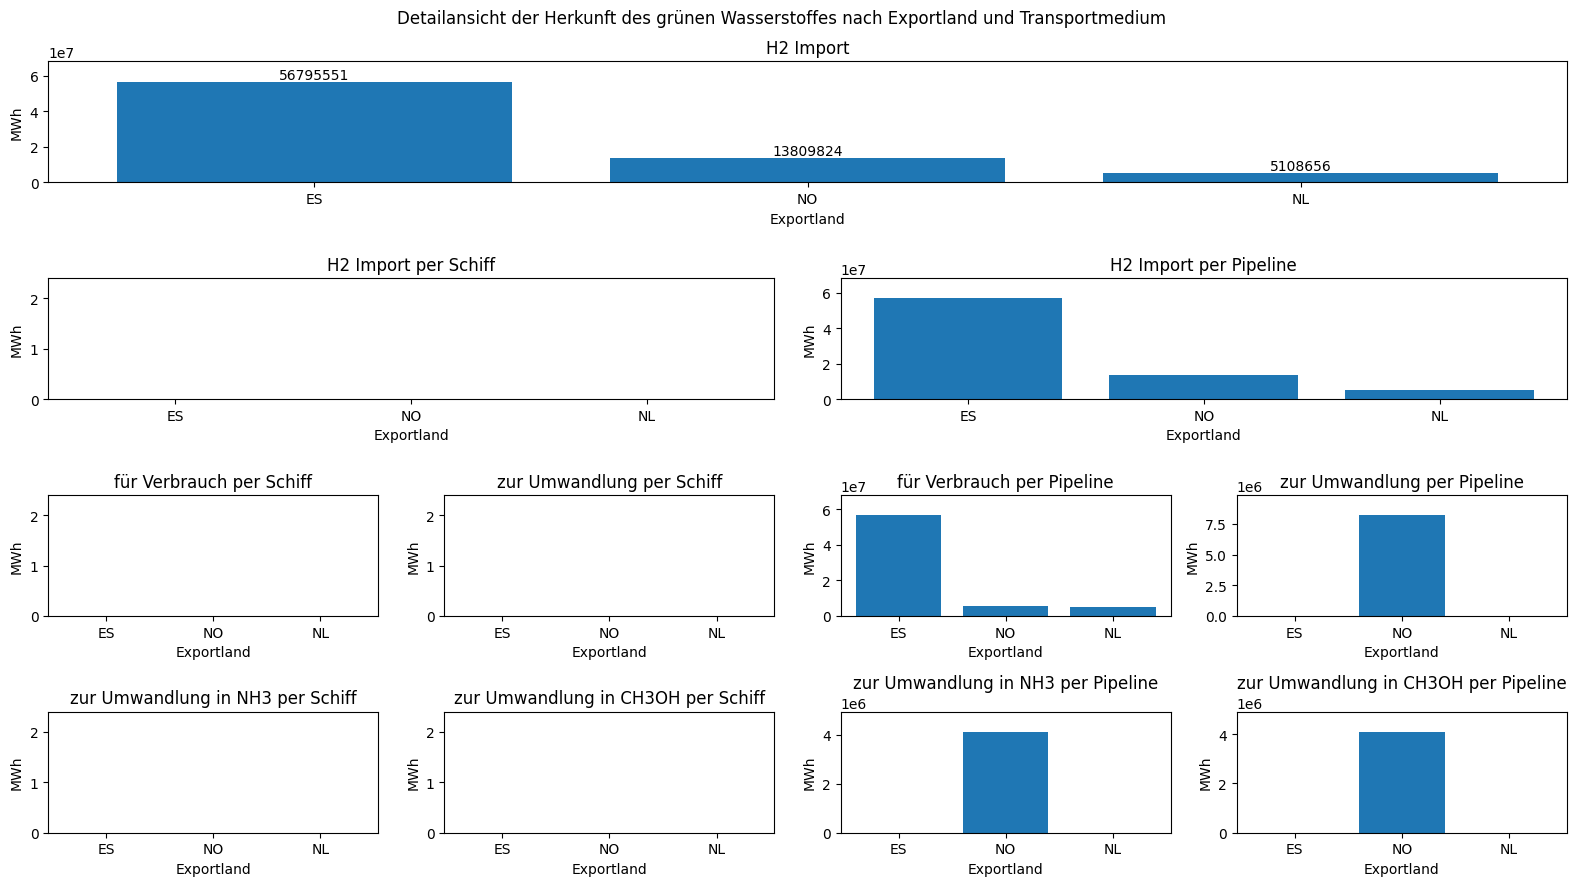

In [8]:
base_case.visualize(what="hydrogen_conversion", vis_style="bar")
#plt.savefig("Basis Szenario - Wasserstoff Detail - Bar")

In [9]:
base_case_import_limit = hydro_opt(use_import_limits=True)

In [10]:
base_case_import_limit_opt = base_case_import_limit.optimize(return_model=True)

ERROR: Unable to clone Pyomo component attribute. Component
'import_constraints_index' contains an uncopyable field '_init_dimen' (<class
'pyomo.core.base.initializer.ConstantInitializer'>).  Setting field to `None`
on new object


base_case_import_limit.visualize()

base_case_import_limit.visualize(what = "commodities", vis_style = "bar")

base_case_import_limit.visualize(what="hydrogen_conversion", vis_style="bar")

# Demonstration of different Visualisations based on the acces of .results_df

In [11]:
imported_quantities_base_case = base_case.results_df[['H2 Schiff', 'H2 Pipeline',
                                                      'H2 zu NH3 Schiff', 'H2 zu NH3 Pipeline', 'H2 zu CH3OH Schiff', 'H2 zu CH3OH Pipeline',
                                                      'NH3 Schiff', 'NH3 Pipeline', 'CH3OH Schiff', 'CH3OH Pipeline']]

In [12]:
imported_quantities_base_case_with_import_limits = base_case_import_limit.results_df[['H2 Schiff', 'H2 Pipeline',
                                                                                      'H2 zu NH3 Schiff', 'H2 zu NH3 Pipeline', 'H2 zu CH3OH Schiff', 'H2 zu CH3OH Pipeline',
                                                                                      'NH3 Schiff', 'NH3 Pipeline', 'CH3OH Schiff', 'CH3OH Pipeline']]

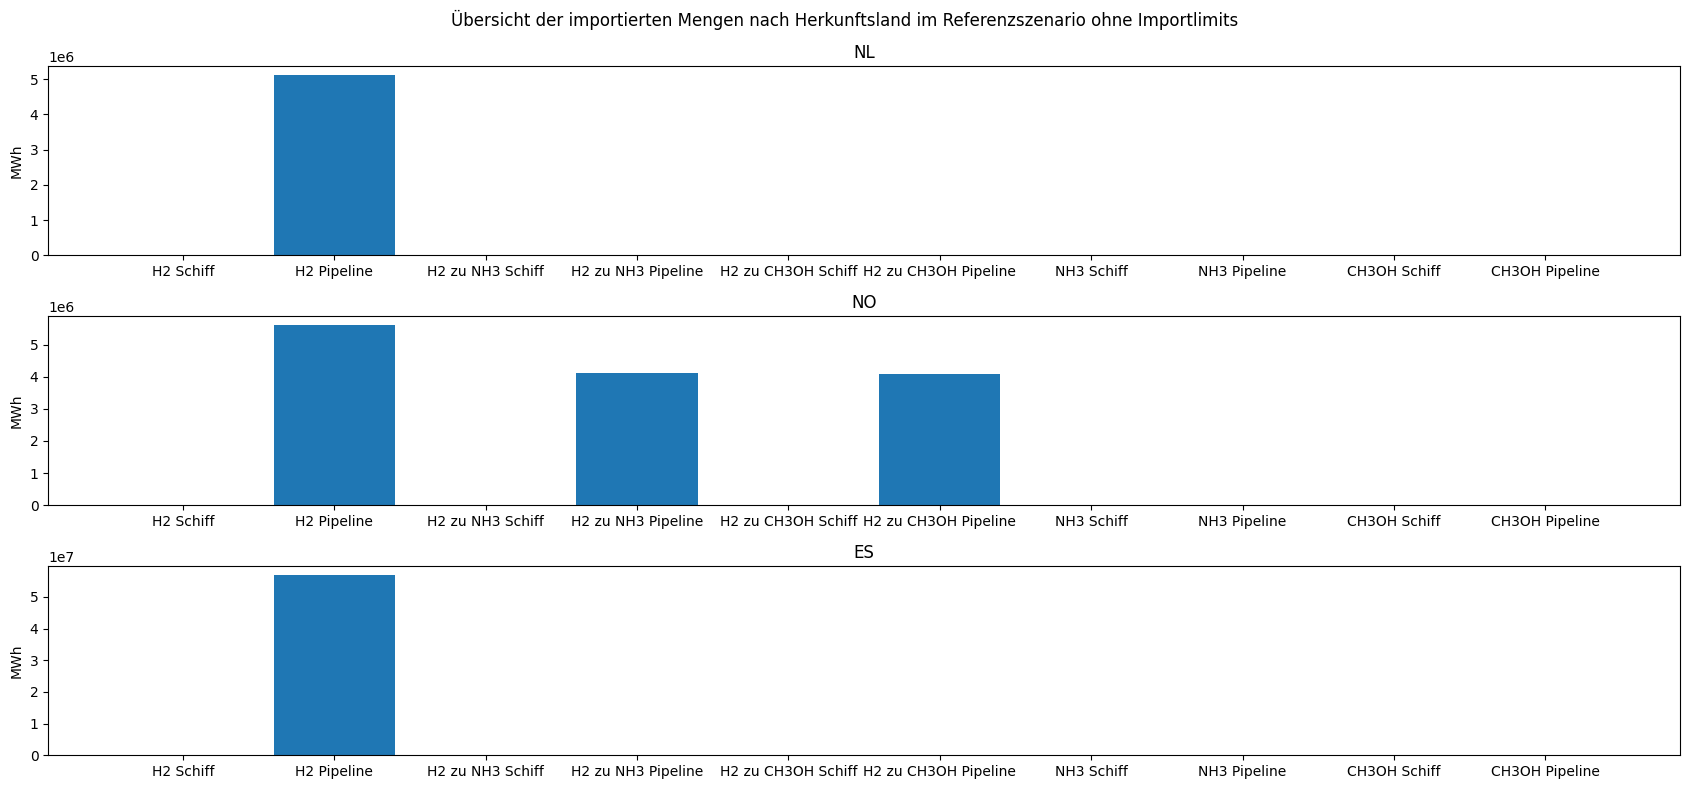

In [13]:
df = imported_quantities_base_case[(imported_quantities_base_case > 0).any(axis=1)]
fig, ax = plt.subplots(3, 1, figsize=(17,8))
plt.suptitle("Übersicht der importierten Mengen nach Herkunftsland im Referenzszenario ohne Importlimits")
for i in range(3):
    values = df.iloc[[i]]
    ax[i].bar(values.columns, df.iloc[i].values)
    ax[i].set_ylabel("MWh")
    ax[i].set_title(df.iloc[[i]].index[0])
plt.tight_layout()
#plt.savefig("Basis Szenario - importierte Mengen ohne Importlimits", bbox_inches="tight")

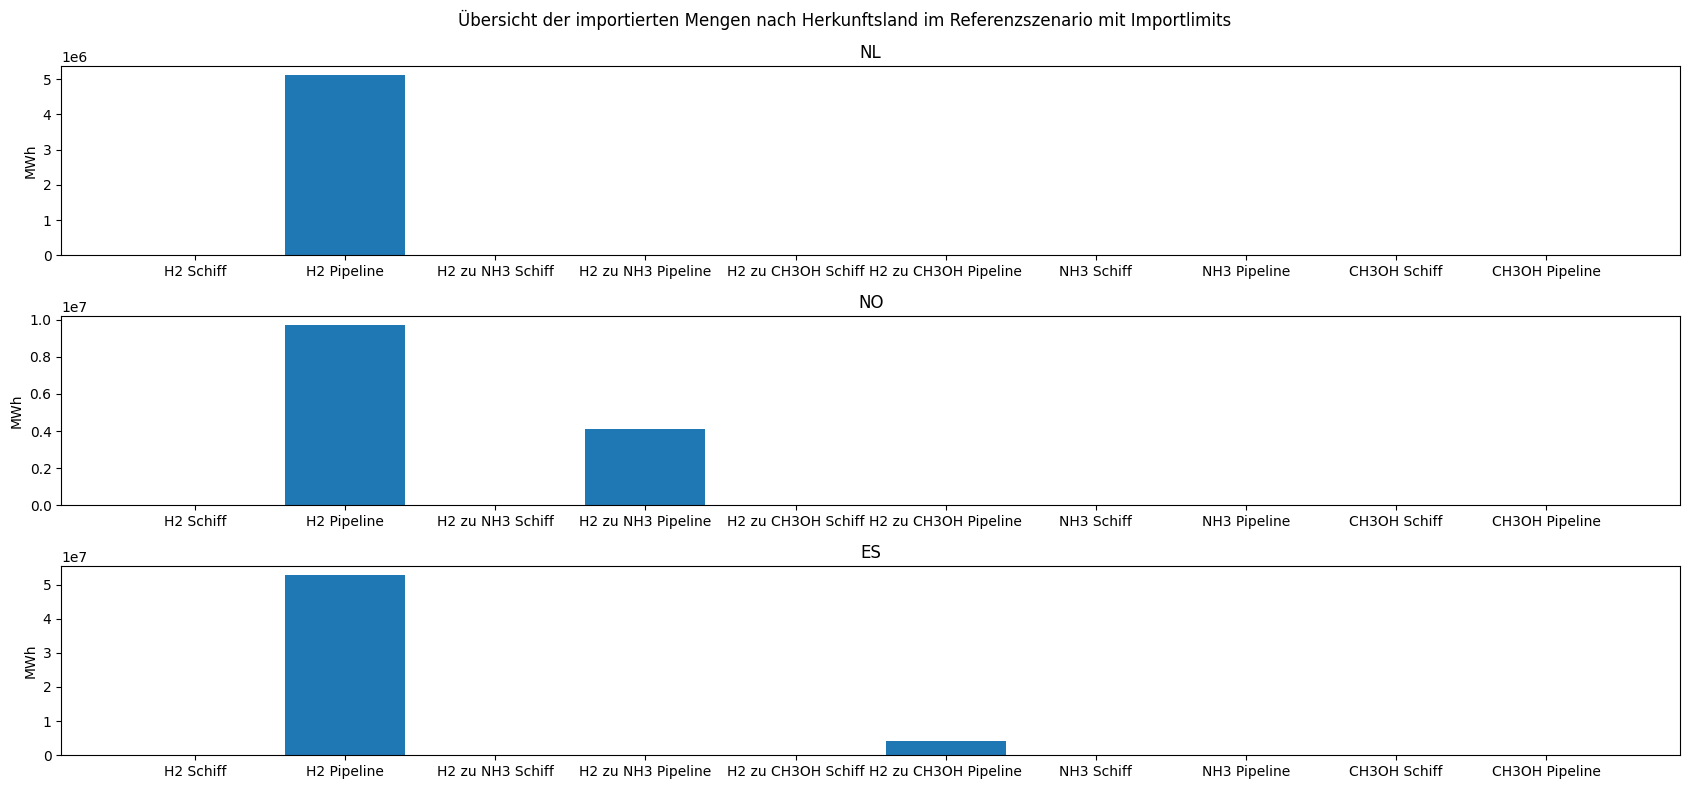

In [14]:
df = imported_quantities_base_case_with_import_limits[(imported_quantities_base_case_with_import_limits > 0).any(axis=1)]
fig, ax = plt.subplots(3, 1, figsize=(17,8))
plt.suptitle("Übersicht der importierten Mengen nach Herkunftsland im Referenzszenario mit Importlimits")
for i in range(3):
    values = df.iloc[[i]]
    ax[i].bar(values.columns, df.iloc[i].values)
    ax[i].set_ylabel("MWh")
    ax[i].set_title(df.iloc[[i]].index[0])
plt.tight_layout()
#plt.savefig("Basis Szenario - importierte Mengen mit Importlimits", bbox_inches="tight")

# Acces of the model results via .instance

In [15]:
base_case.instance.display()

Model unknown

  Variables:
    h2_amount_ship : Size=113, Index=h2_amount_ship_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
         AE :     0 :   0.0 :  None : False :  True : NonNegativeReals
         AO :     0 :   0.0 :  None : False :  True : NonNegativeReals
         AR :     0 :   0.0 :  None : False :  True : NonNegativeReals
         AT :     0 :   0.0 :  None : False :  True : NonNegativeReals
         AU :     0 :   0.0 :  None : False :  True : NonNegativeReals
         AZ :     0 :   0.0 :  None : False :  True : NonNegativeReals
         BD :     0 :   0.0 :  None : False :  True : NonNegativeReals
         BE :     0 :   0.0 :  None : False :  True : NonNegativeReals
         BF :     0 :   0.0 :  None : False :  True : NonNegativeReals
         BG :     0 :   0.0 :  None : False :  True : NonNegativeReals
         BH :     0 :   0.0 :  None : False :  True : NonNegativeReals
         BJ :     0 :   0.0 :  None : False :  True : NonNegativeReals
 

In [16]:
base_case_import_limit.instance.display()

Model unknown

  Variables:
    h2_amount_ship : Size=113, Index=h2_amount_ship_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
         AE :     0 :   0.0 :  None : False : False : NonNegativeReals
         AO :     0 :   0.0 :  None : False : False : NonNegativeReals
         AR :     0 :   0.0 :  None : False : False : NonNegativeReals
         AT :     0 :   0.0 :  None : False : False : NonNegativeReals
         AU :     0 :   0.0 :  None : False : False : NonNegativeReals
         AZ :     0 :   0.0 :  None : False : False : NonNegativeReals
         BD :     0 :   0.0 :  None : False : False : NonNegativeReals
         BE :     0 :   0.0 :  None : False : False : NonNegativeReals
         BF :     0 :   0.0 :  None : False : False : NonNegativeReals
         BG :     0 :   0.0 :  None : False : False : NonNegativeReals
         BH :     0 :   0.0 :  None : False : False : NonNegativeReals
         BJ :     0 :   0.0 :  None : False : False : NonNegativeReals
 

In [17]:
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.0f}'.format

In [18]:
base_case.results_df.sum()

H2 Schiff                           0
H2 Pipeline                  67500000
H2 zu NH3 Schiff                    0
H2 zu NH3 Pipeline            4117647
H2 für NH3 Umwandlung         4117647
H2 zu CH3OH Schiff                  0
H2 zu CH3OH Pipeline          4096386
H2 für CH3OH Umwandlung       4096386
H2 für Umwandlung             8214033
H2 Import                    75714033
NH3 Schiff                          0
NH3 Pipeline                        0
NH3 Import                          0
CH3OH Schiff                        0
CH3OH Pipeline                      0
CH3OH Import                        0
Gesamter Import              75714033
H2 Gesamt Schiff                    0
H2 Gesamt Pipeline           75714033
H2 für Umwandlung Schiff            0
H2 für Umwandlung Pipeline    8214033
dtype: float64